In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [2]:
r = readers.CollectionReader('../src/batch_size/agents/')

100%|██████████| 128/128 [00:10<00:00, 11.73it/s]


In [4]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index

In [5]:
games= ["Walker2d-v2", "Humanoid-v2", "Swimmer-v2", "Hopper-v2",
        "HalfCheetah-v2", "InvertedPendulum-v2", "Reacher-v2",
        "InvertedDoublePendulum-v2"]
code_level_opts = {
      'kl_penalty_direction': ['new_to_old'],
      "clip_eps": [1e8],
      "kl_penalty_coeff": [3.0],
      "t": [128, 256],
      "train_steps": [4000, 8000],
}

NUM_BINS = 20

In [7]:
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
opt = opt.merge(key_metadata, on='exp_id')

In [8]:
def filter_df(df, **kwargs):
    for k,v in kwargs.items():
        df = df[df[k] == v]
    return df

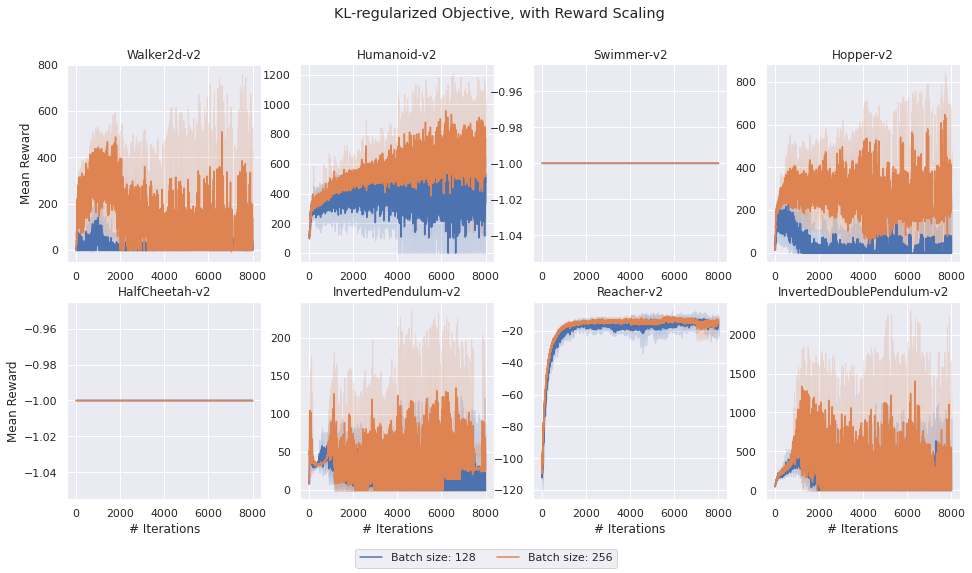

In [11]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for b in code_level_opts['t']:
        filt = filter_df(opt, t=b, game=g)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                 ax=ax.flatten()[j], label=f"Batch size: {b}", legend=False)
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
fig.suptitle('KL-regularized Objective, with Reward Scaling')
    

handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2)    
    
plt.show()